# Step A: Data Pre-Processing

## Step 1: Importing libs

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

## Step 2:Importing the dataset

In [2]:
bank_data=pd.read_csv("Churn_Modelling.csv")

In [3]:
bank_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#dropping 1st 3 cols from dataset
bank_data=bank_data.drop(['RowNumber','CustomerId' ,'Surname'], axis=1)

In [5]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Step 3: To create Feature Matrix(X) and Dependent variable vector(Y)

In [6]:
x=bank_data.iloc[:,:-1].values
y=bank_data.iloc[:,-1].values

In [7]:
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [8]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

## Step 4- replacing missing values(no missing values)

## Step 5: Encoding the categorical data

## Feature matrix using OneHotEncoder

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [1,2])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [10]:
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [11]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

## Step 6: Splitting dataset into training and testing dataset

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [14]:
xtrain

array([[-0.99850112,  1.71490137, -0.57273139, ..., -1.55337352,
         0.97725852,  0.42739449],
       [ 1.00150113, -0.58312392, -0.57273139, ..., -1.55337352,
        -1.02327069, -1.02548708],
       [-0.99850112,  1.71490137, -0.57273139, ...,  0.64376017,
         0.97725852, -0.94479772],
       ...,
       [ 1.00150113, -0.58312392, -0.57273139, ...,  0.64376017,
         0.97725852, -0.14096853],
       [ 1.00150113, -0.58312392, -0.57273139, ...,  0.64376017,
         0.97725852,  0.01781218],
       [-0.99850112,  1.71490137, -0.57273139, ...,  0.64376017,
        -1.02327069, -1.15822478]])

In [15]:
xtest

array([[ 0.98019606, -0.56118125, -0.57812007, ...,  0.65543311,
         0.9426421 , -0.04925965],
       [ 0.98019606, -0.56118125, -0.57812007, ...,  0.65543311,
        -1.06084802, -0.58254072],
       [ 0.98019606, -0.56118125, -0.57812007, ..., -1.52570869,
         0.9426421 , -0.16313933],
       ...,
       [-1.02020406, -0.56118125,  1.72974448, ..., -1.52570869,
         0.9426421 ,  1.07759708],
       [-1.02020406,  1.78195548, -0.57812007, ...,  0.65543311,
         0.9426421 ,  1.14197101],
       [-1.02020406,  1.78195548, -0.57812007, ...,  0.65543311,
         0.9426421 , -0.88821212]])

## Step B: Build Artificial Neural Net(ANN) Model Model

In [16]:
from tensorflow.keras.layers import Dropout

# model with 1 hidden layer

In [17]:
d1=tf.keras.models.Sequential()

In [18]:
#first hidden layer
d1.add(tf.keras.layers.Dense(units=12,activation='relu'))
#output layer
d1.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

## Compile the model

In [19]:
d1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
d1.fit(xtrain, ytrain, epochs=500, validation_data=(xtest,ytest),callbacks=[early_stop])

Epoch 1/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4772 - accuracy: 0.7995 - val_loss: 0.4477 - val_accuracy: 0.8045
Epoch 2/500
250/250 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.8117 - val_loss: 0.4285 - val_accuracy: 0.8105
Epoch 3/500
250/250 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8171 - val_loss: 0.4144 - val_accuracy: 0.8200
Epoch 4/500
250/250 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8246 - val_loss: 0.4006 - val_accuracy: 0.8310
Epoch 5/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8307 - val_loss: 0.3895 - val_accuracy: 0.8395
Epoch 6/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8361 - val_loss: 0.3780 - val_accuracy: 0.8415
Epoch 7/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.8425 - val_loss: 0.3696 - val_accuracy: 0.8470

Epoch 58/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8614 - val_loss: 0.3370 - val_accuracy: 0.8580
Epoch 59/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8608 - val_loss: 0.3366 - val_accuracy: 0.8620
Epoch 60/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8614 - val_loss: 0.3362 - val_accuracy: 0.8595
Epoch 61/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8601 - val_loss: 0.3377 - val_accuracy: 0.8590
Epoch 62/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8614 - val_loss: 0.3367 - val_accuracy: 0.8610
Epoch 63/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8595 - val_loss: 0.3370 - val_accuracy: 0.8590
Epoch 64/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8599 - val_loss: 0.3381 - val_accuracy:

Epoch 115/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3356 - accuracy: 0.8610 - val_loss: 0.3353 - val_accuracy: 0.8630
Epoch 116/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.8602 - val_loss: 0.3354 - val_accuracy: 0.8620
Epoch 117/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3354 - accuracy: 0.8622 - val_loss: 0.3351 - val_accuracy: 0.8625
Epoch 118/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3359 - accuracy: 0.8616 - val_loss: 0.3350 - val_accuracy: 0.8645
Epoch 119/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8620 - val_loss: 0.3349 - val_accuracy: 0.8635
Epoch 120/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8619 - val_loss: 0.3346 - val_accuracy: 0.8615
Epoch 121/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.8634 - val_loss: 0.3354 - val_ac

In [21]:
losses1=pd.DataFrame(d1.history.history)
losses1


,loss,accuracy,val_loss,val_accuracy
0,0.477199,0.799500,0.447670,0.8045
1,0.439426,0.811750,0.428465,0.8105
2,0.425602,0.817125,0.414426,0.8200
3,0.413287,0.824625,0.400635,0.8310
4,0.399760,0.830750,0.389476,0.8395
...,...,...,...,...
118,0.335359,0.862000,0.334866,0.8635
119,0.335676,0.861875,0.334612,0.8615
120,0.335853,0.863375,0.335384,0.8640
121,0.335190,0.861375,0.334518,0.8630


<AxesSubplot:>

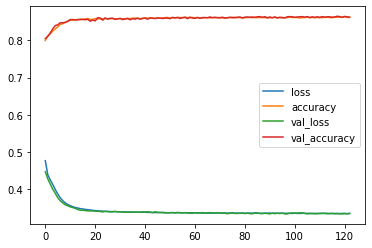

In [22]:
losses1.plot()

## Testing the model

In [23]:
yestimated=d1.predict(xtest)
yestimated=(yestimated>0.5)

In [24]:
yestimated

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

## Performance metrics 

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score
cm=confusion_matrix(ytest, yestimated) 
print('confusion matrix')
print(cm)
print('accuracy=', accuracy_score(ytest,yestimated))
print('precision=', precision_score(ytest,yestimated))
print('recall=', recall_score(ytest, yestimated))

confusion matrix
[[1521   64]
 [ 212  203]]
accuracy= 0.862
precision= 0.7602996254681648
recall= 0.4891566265060241


## Model using 2 hidden layers

In [26]:
d2=tf.keras.models.Sequential()

In [27]:
#first hidden layer
d2.add(tf.keras.layers.Dense(units=12,activation='relu'))
#2nd hidden layer
d2.add(tf.keras.layers.Dense(units=8,activation='relu'))
#output layer
d2.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [28]:
d2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
d2.fit(xtrain, ytrain, epochs=500, validation_data=(xtest,ytest),callbacks=[early_stop])

Epoch 1/500
250/250 [==============================] - 1s 4ms/step - loss: 0.5169 - accuracy: 0.7822 - val_loss: 0.4442 - val_accuracy: 0.8085
Epoch 2/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4393 - accuracy: 0.8111 - val_loss: 0.4170 - val_accuracy: 0.8165
Epoch 3/500
250/250 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8159 - val_loss: 0.4063 - val_accuracy: 0.8235
Epoch 4/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4140 - accuracy: 0.8225 - val_loss: 0.3975 - val_accuracy: 0.8285
Epoch 5/500
250/250 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8266 - val_loss: 0.3910 - val_accuracy: 0.8310
Epoch 6/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8282 - val_loss: 0.3851 - val_accuracy: 0.8345
Epoch 7/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8306 - val_loss: 0.3837 - val_accuracy: 0.8375

250/250 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8612 - val_loss: 0.3350 - val_accuracy: 0.8645
Epoch 58/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8629 - val_loss: 0.3360 - val_accuracy: 0.8640
Epoch 59/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3282 - accuracy: 0.8645 - val_loss: 0.3385 - val_accuracy: 0.8600
Epoch 60/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3290 - accuracy: 0.8644 - val_loss: 0.3358 - val_accuracy: 0.8665
Epoch 61/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8636 - val_loss: 0.3365 - val_accuracy: 0.8605
Epoch 62/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3275 - accuracy: 0.8635 - val_loss: 0.3353 - val_accuracy: 0.8635
Epoch 63/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8627 - val_loss: 0.3345 - val_accuracy: 0.8685
Epoch

In [30]:
losses2=pd.DataFrame(d2.history.history)
losses2

,loss,accuracy,val_loss,val_accuracy
0,0.516883,0.782250,0.444181,0.8085
1,0.439280,0.811125,0.417045,0.8165
2,0.423926,0.815875,0.406339,0.8235
3,0.413985,0.822500,0.397513,0.8285
4,0.405835,0.826625,0.391003,0.8310
...,...,...,...,...
83,0.325233,0.863750,0.335553,0.8650
84,0.324664,0.864000,0.336768,0.8630
85,0.325147,0.863125,0.336823,0.8655
86,0.324430,0.864625,0.338474,0.8615


<AxesSubplot:>

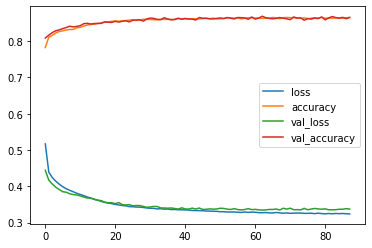

In [31]:
losses2.plot()

In [32]:
yestimated1=d2.predict(xtest)
yestimated1=(yestimated1>0.5)

In [33]:
yestimated1

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [34]:
cm1=confusion_matrix(ytest, yestimated) 
print('confusion matrix')
print(cm1)
print('accuracy=', accuracy_score(ytest,yestimated))
print('precision=', precision_score(ytest,yestimated))
print('recall=', recall_score(ytest, yestimated))

confusion matrix
[[1521   64]
 [ 212  203]]
accuracy= 0.862
precision= 0.7602996254681648
recall= 0.4891566265060241


## model with 3 hidden layers and dropout

In [35]:
d3=tf.keras.models.Sequential()

In [36]:
#first hidden layer
d3.add(tf.keras.layers.Dense(units=12,activation='relu'))
d3.add(Dropout(0.5))
#2nd hidden layer
d3.add(tf.keras.layers.Dense(units=8,activation='relu'))
d3.add(Dropout(0.5))
#3rd hidden layer
d3.add(tf.keras.layers.Dense(units=4,activation='relu'))
d3.add(Dropout(0.5))
#output layer
d3.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [37]:
d3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
d3.fit(xtrain, ytrain, epochs=400, validation_data=(xtest,ytest) )

Epoch 1/400
250/250 [==============================] - 1s 3ms/step - loss: 0.6499 - accuracy: 0.7318 - val_loss: 0.5366 - val_accuracy: 0.7925
Epoch 2/400
250/250 [==============================] - 1s 2ms/step - loss: 0.5681 - accuracy: 0.7844 - val_loss: 0.5062 - val_accuracy: 0.7925
Epoch 3/400
250/250 [==============================] - 1s 2ms/step - loss: 0.5363 - accuracy: 0.7958 - val_loss: 0.4944 - val_accuracy: 0.7925
Epoch 4/400
250/250 [==============================] - 1s 2ms/step - loss: 0.5184 - accuracy: 0.7971 - val_loss: 0.4895 - val_accuracy: 0.7925
Epoch 5/400
250/250 [==============================] - 0s 2ms/step - loss: 0.5091 - accuracy: 0.7977 - val_loss: 0.4842 - val_accuracy: 0.7925
Epoch 6/400
250/250 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7976 - val_loss: 0.4785 - val_accuracy: 0.7925
Epoch 7/400
250/250 [==============================] - 1s 2ms/step - loss: 0.4952 - accuracy: 0.7980 - val_loss: 0.4700 - val_accuracy: 0.7925

Epoch 58/400
250/250 [==============================] - 1s 3ms/step - loss: 0.4511 - accuracy: 0.8027 - val_loss: 0.4044 - val_accuracy: 0.7975
Epoch 59/400
250/250 [==============================] - 1s 2ms/step - loss: 0.4461 - accuracy: 0.8027 - val_loss: 0.4051 - val_accuracy: 0.7970
Epoch 60/400
250/250 [==============================] - 1s 2ms/step - loss: 0.4436 - accuracy: 0.8054 - val_loss: 0.4054 - val_accuracy: 0.7970
Epoch 61/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.8037 - val_loss: 0.4080 - val_accuracy: 0.7970
Epoch 62/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.8060 - val_loss: 0.4077 - val_accuracy: 0.7980
Epoch 63/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.8060 - val_loss: 0.4039 - val_accuracy: 0.7980
Epoch 64/400
250/250 [==============================] - 1s 2ms/step - loss: 0.4395 - accuracy: 0.8051 - val_loss: 0.3998 - val_accuracy:

250/250 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.8081 - val_loss: 0.4009 - val_accuracy: 0.8050
Epoch 115/400
250/250 [==============================] - 1s 3ms/step - loss: 0.4421 - accuracy: 0.8069 - val_loss: 0.3996 - val_accuracy: 0.8045
Epoch 116/400
250/250 [==============================] - 1s 3ms/step - loss: 0.4439 - accuracy: 0.8044 - val_loss: 0.3984 - val_accuracy: 0.8035
Epoch 117/400
250/250 [==============================] - 1s 3ms/step - loss: 0.4503 - accuracy: 0.8051 - val_loss: 0.4019 - val_accuracy: 0.8025
Epoch 118/400
250/250 [==============================] - 1s 2ms/step - loss: 0.4445 - accuracy: 0.8065 - val_loss: 0.3992 - val_accuracy: 0.8055
Epoch 119/400
250/250 [==============================] - 1s 2ms/step - loss: 0.4442 - accuracy: 0.8106 - val_loss: 0.3986 - val_accuracy: 0.8065
Epoch 120/400
250/250 [==============================] - 1s 3ms/step - loss: 0.4431 - accuracy: 0.8062 - val_loss: 0.4003 - val_accuracy: 0.8030

250/250 [==============================] - 1s 2ms/step - loss: 0.4426 - accuracy: 0.8086 - val_loss: 0.3950 - val_accuracy: 0.8075
Epoch 171/400
250/250 [==============================] - 1s 2ms/step - loss: 0.4424 - accuracy: 0.8111 - val_loss: 0.3945 - val_accuracy: 0.8070
Epoch 172/400
250/250 [==============================] - 1s 3ms/step - loss: 0.4426 - accuracy: 0.8102 - val_loss: 0.3930 - val_accuracy: 0.8075
Epoch 173/400
250/250 [==============================] - 1s 2ms/step - loss: 0.4387 - accuracy: 0.8149 - val_loss: 0.3890 - val_accuracy: 0.8080
Epoch 174/400
250/250 [==============================] - 1s 2ms/step - loss: 0.4421 - accuracy: 0.8124 - val_loss: 0.3887 - val_accuracy: 0.8080
Epoch 175/400
250/250 [==============================] - 1s 2ms/step - loss: 0.4435 - accuracy: 0.8104 - val_loss: 0.3917 - val_accuracy: 0.8095
Epoch 176/400
250/250 [==============================] - 1s 2ms/step - loss: 0.4349 - accuracy: 0.8134 - val_loss: 0.3871 - val_accuracy: 0.8090

250/250 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.8150 - val_loss: 0.3805 - val_accuracy: 0.8095
Epoch 227/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.8130 - val_loss: 0.3842 - val_accuracy: 0.8085
Epoch 228/400
250/250 [==============================] - 1s 2ms/step - loss: 0.4354 - accuracy: 0.8126 - val_loss: 0.3842 - val_accuracy: 0.8085
Epoch 229/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8142 - val_loss: 0.3826 - val_accuracy: 0.8090
Epoch 230/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8130 - val_loss: 0.3856 - val_accuracy: 0.8090
Epoch 231/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8167 - val_loss: 0.3794 - val_accuracy: 0.8120
Epoch 232/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8141 - val_loss: 0.3794 - val_accuracy: 0.8100

250/250 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8173 - val_loss: 0.3808 - val_accuracy: 0.8145
Epoch 283/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.8106 - val_loss: 0.3796 - val_accuracy: 0.8105
Epoch 284/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.8142 - val_loss: 0.3808 - val_accuracy: 0.8120
Epoch 285/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.8138 - val_loss: 0.3828 - val_accuracy: 0.8100
Epoch 286/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8130 - val_loss: 0.3799 - val_accuracy: 0.8105
Epoch 287/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8156 - val_loss: 0.3751 - val_accuracy: 0.8135
Epoch 288/400
250/250 [==============================] - 1s 2ms/step - loss: 0.4289 - accuracy: 0.8156 - val_loss: 0.3755 - val_accuracy: 0.8130

250/250 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8136 - val_loss: 0.3817 - val_accuracy: 0.8120
Epoch 339/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.8149 - val_loss: 0.3812 - val_accuracy: 0.8115
Epoch 340/400
250/250 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.8150 - val_loss: 0.3792 - val_accuracy: 0.8110
Epoch 341/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.8134 - val_loss: 0.3800 - val_accuracy: 0.8115
Epoch 342/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.8142 - val_loss: 0.3783 - val_accuracy: 0.8140
Epoch 343/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.8112 - val_loss: 0.3816 - val_accuracy: 0.8100
Epoch 344/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8141 - val_loss: 0.3825 - val_accuracy: 0.8105

250/250 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.8126 - val_loss: 0.3797 - val_accuracy: 0.8100
Epoch 395/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8175 - val_loss: 0.3756 - val_accuracy: 0.8130
Epoch 396/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.8117 - val_loss: 0.3786 - val_accuracy: 0.8095
Epoch 397/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8131 - val_loss: 0.3791 - val_accuracy: 0.8120
Epoch 398/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8092 - val_loss: 0.3807 - val_accuracy: 0.8100
Epoch 399/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8160 - val_loss: 0.3770 - val_accuracy: 0.8130
Epoch 400/400
250/250 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8117 - val_loss: 0.3794 - val_accuracy: 0.8095

In [39]:
losses3=pd.DataFrame(d3.history.history)
losses3

,loss,accuracy,val_loss,val_accuracy
0,0.649887,0.731750,0.536624,0.7925
1,0.568067,0.784375,0.506156,0.7925
2,0.536281,0.795750,0.494398,0.7925
3,0.518422,0.797125,0.489508,0.7925
4,0.509147,0.797750,0.484242,0.7925
...,...,...,...,...
395,0.439449,0.811750,0.378611,0.8095
396,0.437971,0.813125,0.379139,0.8120
397,0.436750,0.809250,0.380731,0.8100
398,0.432678,0.816000,0.377022,0.8130


<AxesSubplot:>

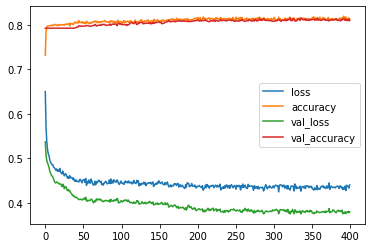

In [40]:
losses3.plot()